In [3]:
import warnings
warnings.simplefilter("ignore")
import seaborn as sn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [4]:
import pandas as pd
df=pd.read_csv("covid_dataset.csv")
print(df)

             Date             Country  Confirmed  Recovered  Deaths
0      2020-01-22         Afghanistan          0          0       0
1      2020-01-22             Albania          0          0       0
2      2020-01-22             Algeria          0          0       0
3      2020-01-22             Andorra          0          0       0
4      2020-01-22              Angola          0          0       0
...           ...                 ...        ...        ...     ...
23683  2020-05-26  West Bank and Gaza        429        365       3
23684  2020-05-26      Western Sahara          9          6       1
23685  2020-05-26               Yemen        249         10      49
23686  2020-05-26              Zambia        920        336       7
23687  2020-05-26            Zimbabwe         56         25       4

[23688 rows x 5 columns]


In [5]:
df.shape

(23688, 5)

In [6]:
df.dtypes

Date         object
Country      object
Confirmed     int64
Recovered     int64
Deaths        int64
dtype: object

In [7]:
df.describe()

,Confirmed,Recovered,Deaths
count,2.368800e+04,23688.000000,23688.000000
mean,7.969368e+03,2581.801714,526.935030
std,5.842109e+04,15143.101257,3992.815956
min,0.000000e+00,0.000000,0.000000
25%,0.000000e+00,0.000000,0.000000
50%,1.800000e+01,1.000000,0.000000
75%,7.300000e+02,123.000000,13.000000
max,1.680913e+06,384902.000000,98913.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23688 entries, 0 to 23687
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Date       23688 non-null  object
 1   Country    23688 non-null  object
 2   Confirmed  23688 non-null  int64 
 3   Recovered  23688 non-null  int64 
 4   Deaths     23688 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 925.4+ KB


<AxesSubplot:>

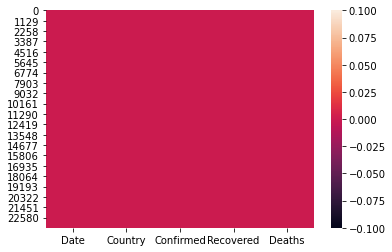

In [9]:
sn.heatmap(df.isnull())

In [10]:
df.isnull().sum()

Date         0
Country      0
Confirmed    0
Recovered    0
Deaths       0
dtype: int64

<Figure size 432x288 with 0 Axes>

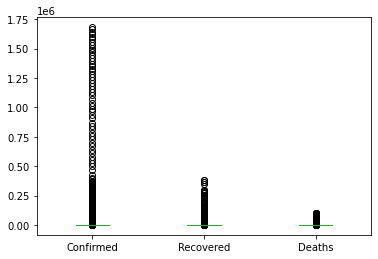

<Figure size 432x288 with 0 Axes>

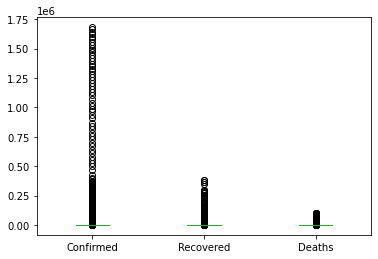

<Figure size 432x288 with 0 Axes>

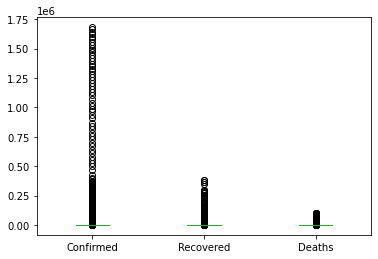

<Figure size 432x288 with 0 Axes>

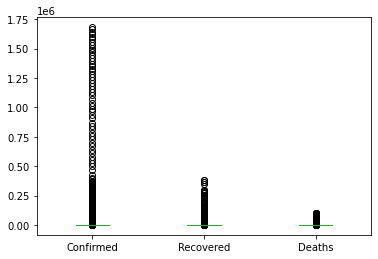

<Figure size 432x288 with 0 Axes>

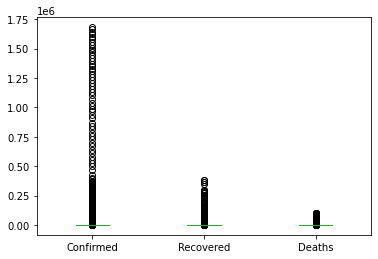

In [11]:
for i in df.columns:
    plt.figure()
    df.plot.box(df[i])

<AxesSubplot:>

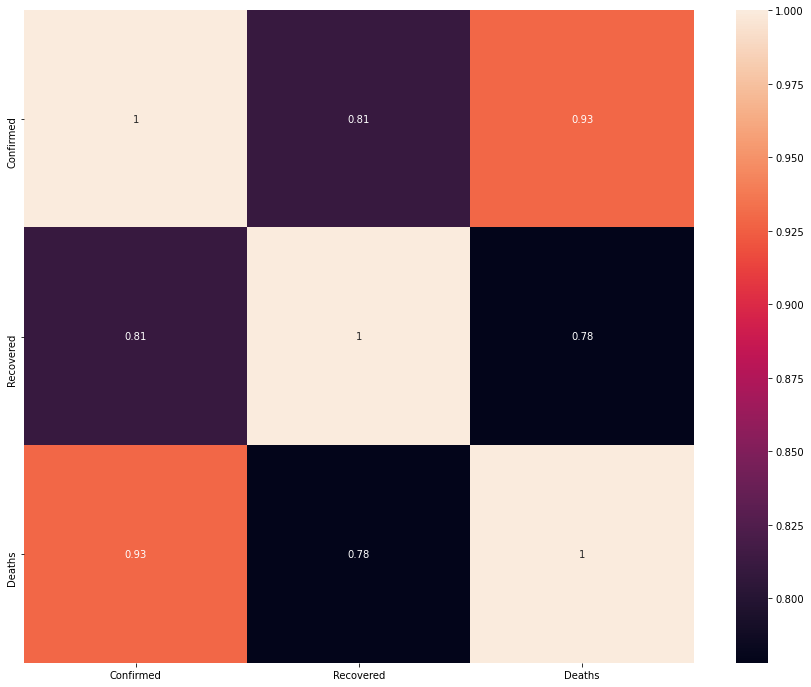

In [12]:
plt.figure(figsize=(15,12))
corr=df.corr() 
sn.heatmap(corr, annot=True)

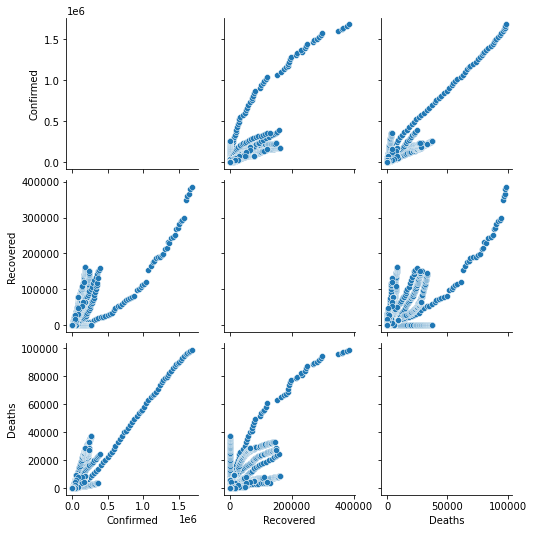

In [13]:
sn.pairplot(df)

In [14]:
df.skew()

Confirmed    18.674502
Recovered    10.662286
Deaths       14.218167
dtype: float64

In [15]:
from sklearn.preprocessing import LabelEncoder 
import pandas as pd
le=LabelEncoder() 
df['Country']=le.fit_transform(df['Country'])
df['Country']

0          0
1          1
2          2
3          3
4          4
        ... 
23683    183
23684    184
23685    185
23686    186
23687    187
Name: Country, Length: 23688, dtype: int32

In [16]:
df['Date']=le.fit_transform(df['Date'])
df['Date']

0          0
1          0
2          0
3          0
4          0
        ... 
23683    125
23684    125
23685    125
23686    125
23687    125
Name: Date, Length: 23688, dtype: int32

In [17]:
df.dtypes

Date         int32
Country      int32
Confirmed    int64
Recovered    int64
Deaths       int64
dtype: object

In [18]:
from scipy.stats import zscore
z=np.abs(zscore(df))
z

array([[1.71835849, 1.72286214, 0.13641539, 0.17049719, 0.13197356],
       [1.71835849, 1.70443581, 0.13641539, 0.17049719, 0.13197356],
       [1.71835849, 1.68600948, 0.13641539, 0.17049719, 0.13197356],
       ...,
       [1.71835849, 1.68600948, 0.13215314, 0.16983681, 0.11970126],
       [1.71835849, 1.70443581, 0.12066732, 0.1483084 , 0.13022038],
       [1.71835849, 1.72286214, 0.13545681, 0.16884624, 0.13097174]])

In [19]:
x=df

In [20]:
x.shape

(23688, 5)

In [21]:
y=df['Deaths']

In [22]:
y.shape

(23688,)

In [31]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score

In [25]:
best_rstate=0
accu=0
for i in range(30,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=35,random_state=i)
    mod=LinearRegression()
    mod.fit(x_train,y_train)
    y_pred=mod.predict(x_test)
    tempaccu=r2_score(y_test,y_pred)
    if tempaccu>accu:
        accu=tempaccu
        best_rstate=i
        print(f" Best accuracy {accu*100} found on random_state {best_rstate} ")

 Best accuracy 100.0 found on random_state 30 


In [26]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=.55, random_state=30)

In [32]:
from sklearn.linear_model import LinearRegression
LR=LinearRegression()
LR.fit(x_train,y_train)
y_pred=LR.predict(x_test)
r2score=r2_score(y_test,y_pred)
cvscore=cross_val_score(LinearRegression(),x_train,y_train,cv=5).mean()
print(f"Accuracy={r2score*100},cross_val_score={cvscore*100} & difference ={(r2score*100)-(cvscore*100)}")

Accuracy=100.0,cross_val_score=100.0 & difference =0.0


In [28]:
from sklearn.ensemble import RandomForestRegressor
RF=RandomForestRegressor()
RF.fit(x_train,y_train)
y_pred=RF.predict(x_test)
r2score=r2_score(y_test,y_pred)
cvscore=cross_val_score(RandomForestRegressor(),x_train,y_train,cv=5).mean()
print(f"Accuracy={r2score*100},cross_val_score={cvscore*100} & difference ={(r2score*100)-(cvscore*100)}")

Accuracy=99.95200120135044,cross_val_score=99.86504754395547 & difference =0.08695365739497163


In [29]:
from sklearn.linear_model import SGDRegressor
SGD=SGDRegressor()
SGD.fit(x_train,y_train)
y_pred=SGD.predict(x_test)
r2score=r2_score(y_test,y_pred)
cvscore=cross_val_score(SGDRegressor(),x_train,y_train,cv=5).mean()
print(f"Accuracy={r2score*100},cross_val_score={cvscore*100} & difference ={(r2score*100)-(cvscore*100)}")

Accuracy=99.99999261839115,cross_val_score=99.99998992846449 & difference =2.6899266600821647e-06


In [30]:
import joblib
joblib.dump(LR,"P project covid.pkl")

['P project covid.pkl']